In [43]:
import requests
from PIL import  Image
from urllib.request import urlopen
puppy_path = "https://th-thumbnailer.cdn-si-edu.com/pl7tMO37jADJMfZ8T1DuIRDaBbc=/fit-in/1600x0/https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer/db/d6/dbd616d4-f52c-43cb-a9c2-4f77a5dcb2d3/eiffel-tower-night.jpg"


image1 = Image.open(urlopen(puppy_path)).convert("RGB")
caption = "glowing Eiffel tower at night"

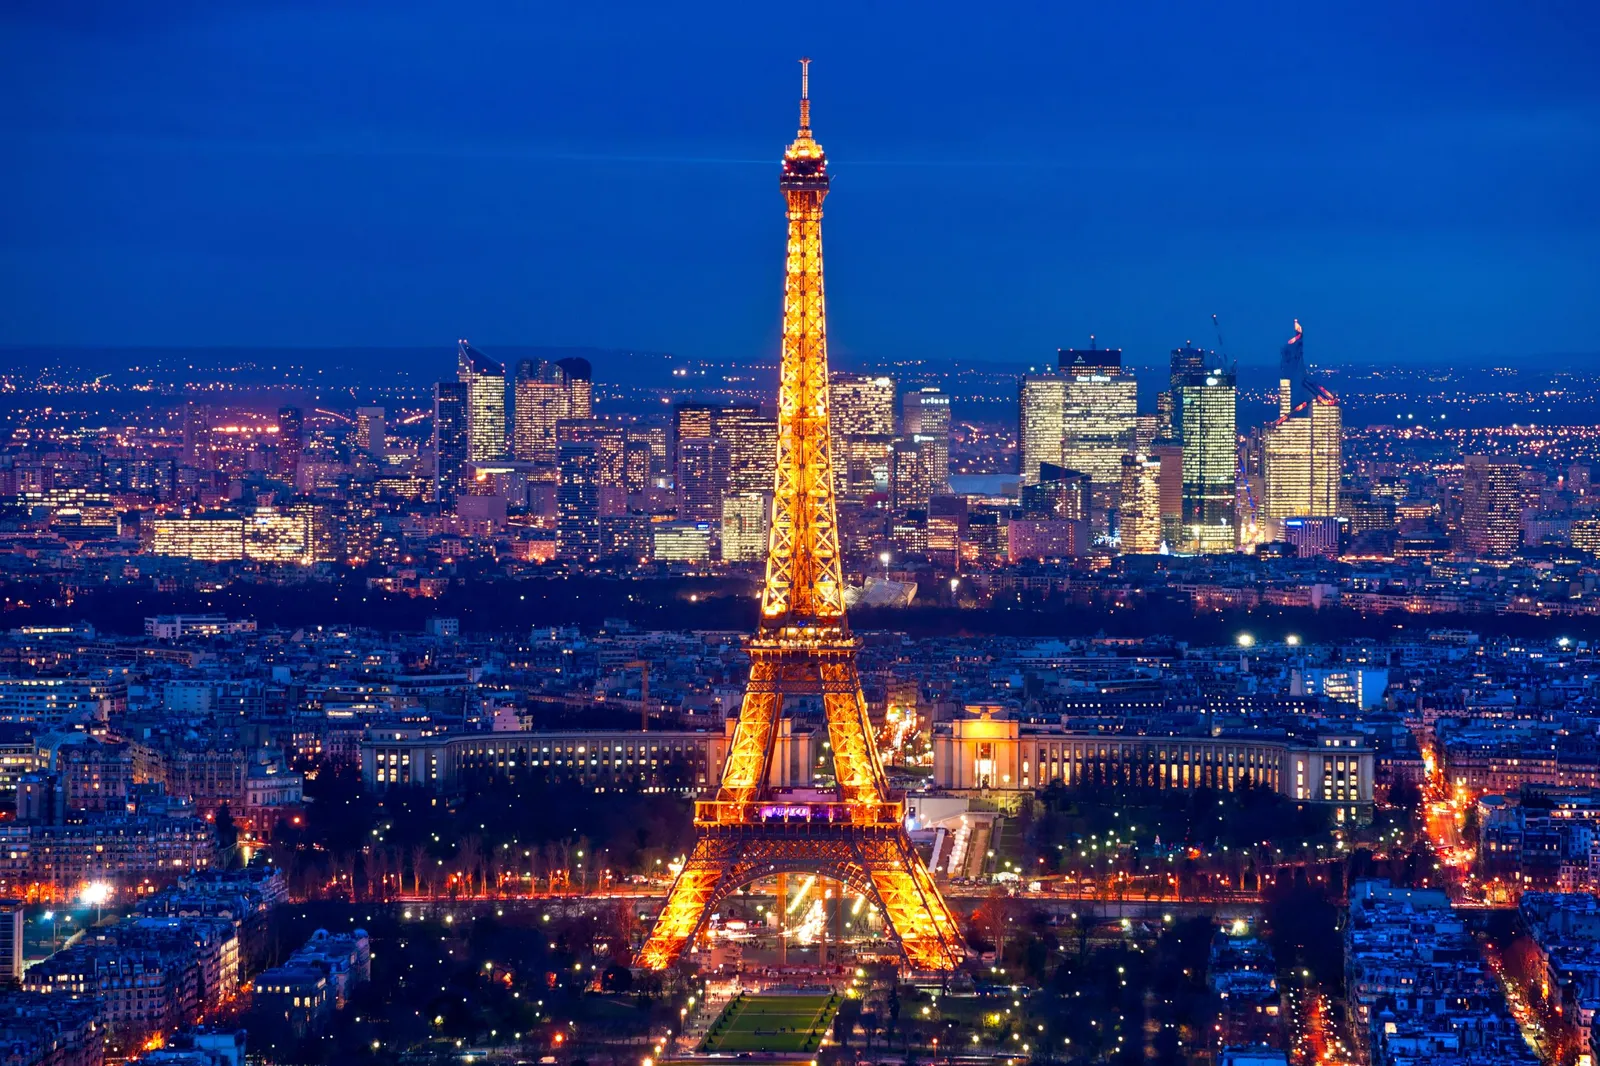

In [44]:
image1

In [45]:
from transformers import CLIPTokenizer, CLIPProcessor, CLIPModel

model_id = "openai/clip-vit-base-patch32"

clip_tokenizer = CLIPTokenizer.from_pretrained(model_id)
clip_processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id)



In [46]:
inputs = clip_tokenizer(caption, return_tensors='pt')
inputs

{'input_ids': tensor([[49406, 18437, 29720,  4730,   536,   930, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [47]:
clip_tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

['<|startoftext|>',
 'glowing</w>',
 'eiffel</w>',
 'tower</w>',
 'at</w>',
 'night</w>',
 '<|endoftext|>']

In [48]:
text_embedding = model.get_text_features(**inputs)
text_embedding.shape

torch.Size([1, 512])

In [49]:
processed_image = clip_processor(
    text = None, images = image1, return_tensors = "pt"
)["pixel_values"]

processed_image.shape

torch.Size([1, 3, 224, 224])

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

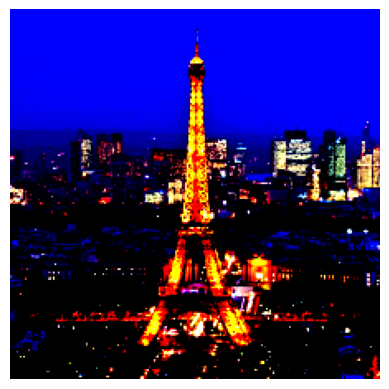

In [50]:
import torch
import numpy as np
import matplotlib.pyplot as plt

img = processed_image.squeeze(0)
img = img.permute(*torch.arange(img.ndim-1, -1, -1))
img = np.einsum("ijk->jik", img)

plt.imshow(img)
plt.axis("off")

In [51]:
img_embedding = model.get_image_features(processed_image)
img_embedding.shape

torch.Size([1, 512])

In [53]:
text_embedding /= text_embedding.norm(dim = -1, keepdim =True)
img_embedding /= img_embedding.norm(dim = -1, keepdim =True)